# Classification Codealong and Journey Ahead

In this session we will be understanding classification Machine Learning pipeline as well as we will be understanding the expectations going ahead.

Following is the entire flow of an end to end Machine Learning solution:

<img src="image/ML_flow.png"/>


In the coming mentor sessions we will be understanding each of the aspect separately

## Forming a Business problem

**A business problem is presented to you. As a data scientist, you must be able to formulate a data science problem that you would be ready to solve.**

You must have or soon will come up with this question of, how a data science problem is identified?
This itself is a process of its own and is a very important aspect as the top notch players of the organization are involved. As a Data Science team is solving a problem for the future so the stakes are very high here.

Whenever you see a problem statement, try to understand the reason for the problem statement being taken up.

**We will have sessions discussing the same in the Sunday sessions**

We have a problem statement given below and similarly will be provided for all the Saturday code along sessions.


### Census Income Dataset

### Problem Statement :
The dataset given below contains the census information about the attributes of individuals as the features and their income as the target. The task is to predict whether a person makes over $50K a year or not.

## About the dataset:
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics).  

The data has 1032 instances and 15 features. For your information the target variable `Income` has already been label encoded.
1 indicates the income is greater than or equal to 50K. 0 indicates the income is less than 50K. Below is a brief about the features in the dataset.

|Features|Description|
|-----|-----|
|age|Age of the person|
|Workclass|Categorical variable having 8 categories each denoting the type of employment|
|fnlwgt|final weight. |
|education|Categorical variable with 16 categories each denoting the qualification of the person.|
|education-num|number of years of education|
|marital-status|Categorical variable with 7 categories|
|occupation|Categorical variable with 14 categories each denoting the type of occupation of the individual|
|relationship|Categorical variable with 6 categories.|
|race|Categorical variable with 5 categories each denoting the ethnicity of the individual|
|sex|Gender of the person|
|capital-gain|Continuous| 
|capital-loss|Continuous|
|hours-per-week|Working hours per week|
|native-country|Categorical|
|Income|Target variable. 1 indicates >=50k. 0 indicates <50K|



## Data Cleaning and EDA

**The next stage is to collect and prepare the data required to solve the data science problem. And a data scientist spends about 60-70% of his time at this stage.**


We will be conducting 2 to 3 code alongs every month involving Data cleaning and EDA as this plays a very important part to create a successful ML model.

* Expectations :

    - Understand the problem solving approach of the mentor
    - Understanding the logic of the code
    - Get familiar with the syntax of the code
    - Clear your queries if any regarding the content

    
*Note : Non programmers need 8-10 hours of effort to get used to the basics of EDA initially (Programmers need 4-6 hours)*

### Reading the data using pandas module.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataframe = pd.read_csv('./data/adult_preprocessed.csv',index_col=0)

In [3]:
dataframe.head()

,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


### Check for null values and get a summary of all the columns in the dataset

In [610]:
# Check for null values
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032 entries, 0 to 1119
Data columns (total 15 columns):
age               1032 non-null int64
Workclass         1032 non-null object
fnlwgt            1032 non-null int64
education         1032 non-null object
education-num     1032 non-null int64
marital-status    1032 non-null object
occupation        1032 non-null object
relationship      1032 non-null object
race              1032 non-null object
sex               1032 non-null object
capital-gain      1032 non-null int64
capital-loss      1032 non-null int64
hours-per-week    1032 non-null int64
native-country    1032 non-null object
Income            1032 non-null int64
dtypes: int64(7), object(8)
memory usage: 129.0+ KB


In [611]:
# Get a summary of the columns in the dataset
dataframe.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
count,1032.000000,1.032000e+03,1032.000000,1032.00000,1032.000000,1032.000000,1032.000000
mean,37.954457,1.918318e+05,10.221899,560.19186,102.870155,40.706395,0.246124
std,12.825353,1.074243e+05,2.501636,2406.47961,432.251488,11.736603,0.430961
min,17.000000,2.117400e+04,1.000000,0.00000,0.000000,1.000000,0.000000
25%,28.000000,1.155792e+05,9.000000,0.00000,0.000000,40.000000,0.000000
50%,37.000000,1.807065e+05,10.000000,0.00000,0.000000,40.000000,0.000000
75%,46.000000,2.461932e+05,13.000000,0.00000,0.000000,45.000000,0.000000
max,90.000000,1.033222e+06,16.000000,25236.00000,2415.000000,99.000000,1.000000


It can be seen that there are no null values in any of the columns. So it is a pretty clean dataset.<br/>
The minimum, 25th percentile, median, 75th percentile values for the columns `capital-gain` and `capital-loss` are 0.

### For further analysis split to bring all the continuous variables together and categorical variables together.

In [612]:
# Seperate continuous variables and categorical variables
dataframe_con = dataframe.select_dtypes(include=np.number)
dataframe_cat = dataframe.select_dtypes(exclude=np.number)

###  Plotting a stacked bar chart, have an estimate of the number of people with income above and below 50K with respect to each of the categorical features

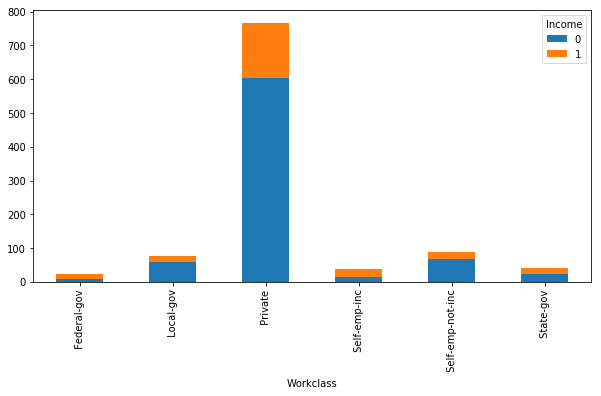

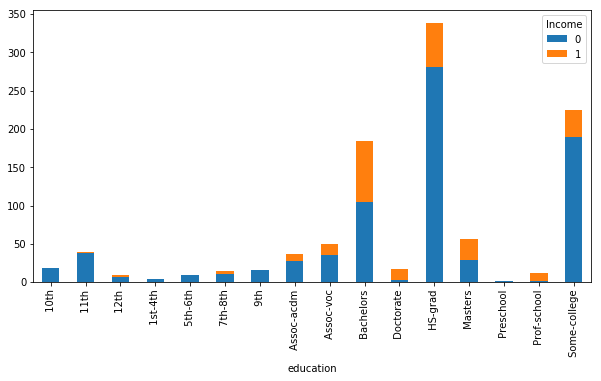

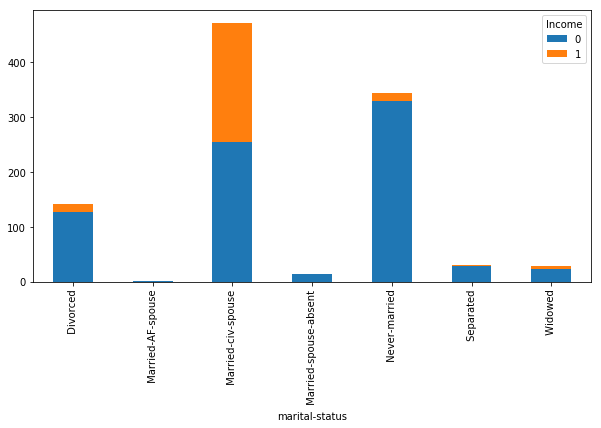

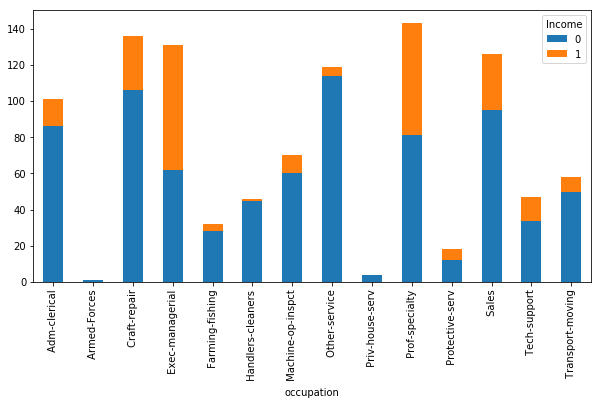

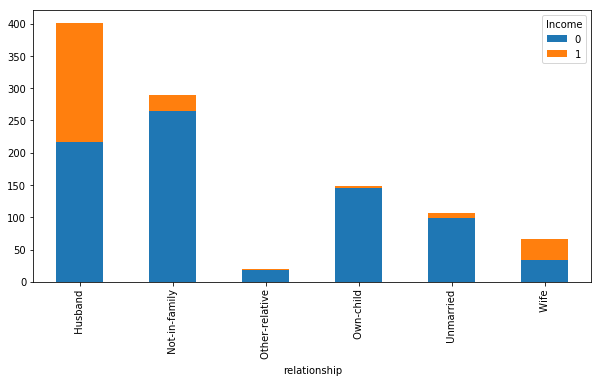

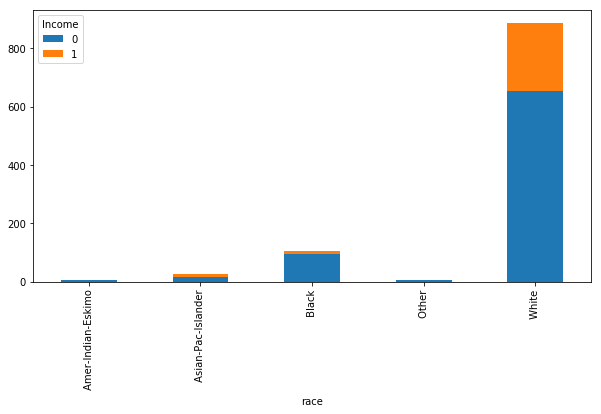

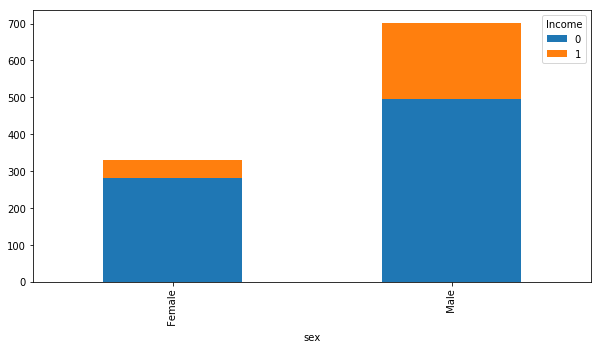

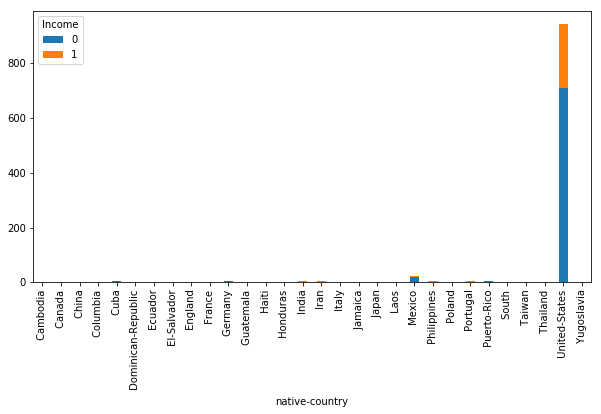

In [613]:
for i in dataframe_cat:
    dataframe.groupby(i)['Income'].value_counts().unstack().plot(kind='bar',stacked=True,figsize=(10,5))



### What can you infer from the above visualisations ?

### Plot a histogram for all the continuous variables to check for skewness

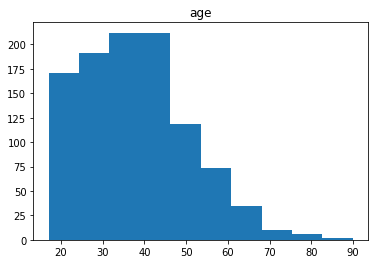

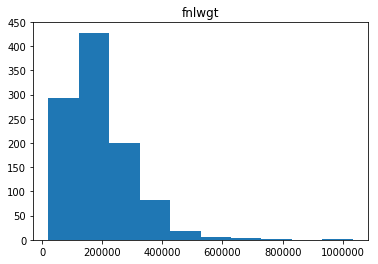

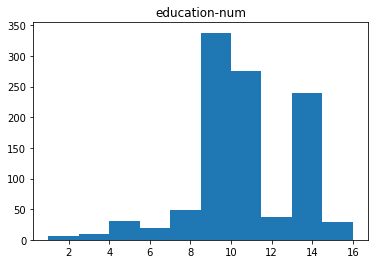

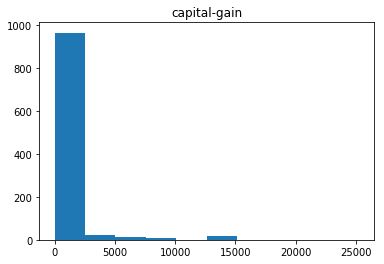

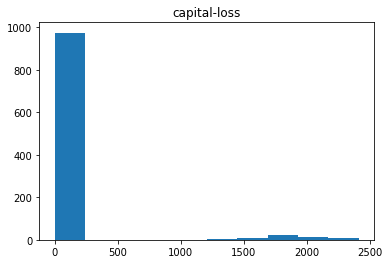

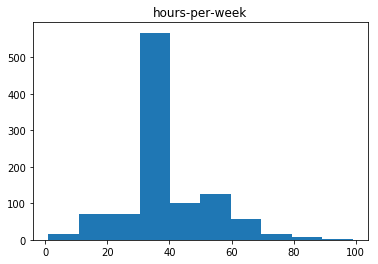

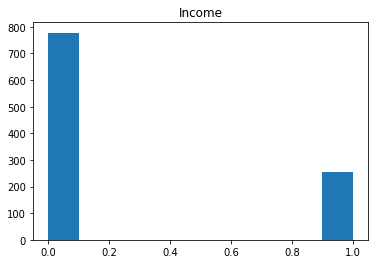

In [614]:
for i in dataframe_con:
    plt.title(i)
    plt.hist(dataframe_con[i])
    plt.show()

### Majority of values in capital-gain and capital-loss are zeros. So remove the columns

In [615]:
dataframe_con.drop(['capital-gain','capital-loss'],1,inplace=True)

### Check for skewness in the continuous data

In [616]:
skewness = pd.DataFrame(data={'name':list(dataframe_con),'skew':skew(dataframe_con)})
skewness

,name,skew
0,age,0.616053
1,fnlwgt,1.393756
2,education-num,-0.302202
3,hours-per-week,0.163186
4,Income,1.178758


### The column `fnlwgt` is a highly right skewed column. Remove the skewness using a log transform and then check if the skewness has been removed by plotting its histogram

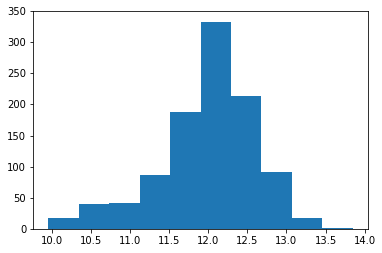

In [617]:
dataframe_con['fnlwgt'] = np.log1p(dataframe_con['fnlwgt'])

plt.hist(dataframe_con['fnlwgt']);

### Check for the pearson correlation between the continuous variables by plotting a heatmap

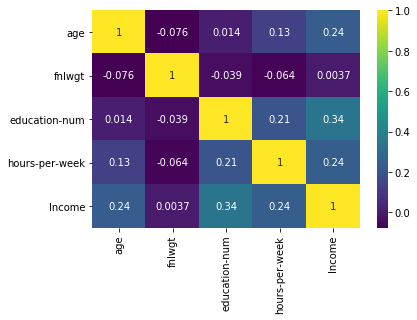

In [618]:
# Check for correlation between continuous variables
sns.heatmap(dataframe_con.corr(),cmap='viridis',annot=True)

### Label Encode all the categorical variables

In [619]:
# Label Encode Categorical variables

le = LabelEncoder()
for col in dataframe_cat:
    dataframe_cat[col] = le.fit_transform(dataframe_cat[col])
     

dataframe_cat.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,5,9,4,0,1,4,1,28
1,4,9,2,3,0,4,1,28
2,2,11,0,5,1,4,1,28
3,2,1,2,5,0,2,1,28
4,2,9,2,9,5,2,0,4


### Concatenate both the continuous and categorical dataframes

In [620]:
new_dataframe = pd.concat([dataframe_con,dataframe_cat],axis=1,ignore_index=True)

new_dataframe.columns = ['age','fnlwgt','education-num','hours-per-week','Income','Workclass','education','marital-status','occupation','relationship','race','sex','native-country']

In [621]:
new_dataframe.head()

,age,fnlwgt,education-num,hours-per-week,Income,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,39,11.258253,13,40,0,5,9,4,0,1,4,1,28
1,50,11.330348,13,13,0,4,9,2,3,0,4,1,28
2,38,12.281398,9,40,0,2,11,0,5,1,4,1,28
3,53,12.366157,7,40,0,2,1,2,5,0,2,1,28
4,28,12.732013,13,40,0,2,9,2,9,5,2,0,4


In [622]:
columns = list(new_dataframe)
columns[4],columns[-1] = 'native-country','Income'

In [623]:
new_dataframe = new_dataframe[columns]

In [624]:
new_dataframe.head()

,age,fnlwgt,education-num,hours-per-week,native-country,Workclass,education,marital-status,occupation,relationship,race,sex,Income
0,39,11.258253,13,40,28,5,9,4,0,1,4,1,0
1,50,11.330348,13,13,28,4,9,2,3,0,4,1,0
2,38,12.281398,9,40,28,2,11,0,5,1,4,1,0
3,53,12.366157,7,40,28,2,1,2,5,0,2,1,0
4,28,12.732013,13,40,4,2,9,2,9,5,2,0,0


### Split into features and target

In [625]:
X = new_dataframe.iloc[:,:-1]
y = new_dataframe.iloc[:,-1]

### Fit a StandardScaler on the features

In [626]:
# Fitting a Standard Scaler 

ss = StandardScaler()
X = ss.fit_transform(X)

### Convert array to a dataframe

In [627]:
X = pd.DataFrame(X,columns=columns[:-1])

In [628]:
X.head()

,age,fnlwgt,education-num,hours-per-week,native-country,Workclass,education,marital-status,occupation,relationship,race,sex
0,0.081561,-1.172711,1.111052,-0.060217,0.260938,3.026993,-0.379789,0.935132,-1.570166,-0.294678,0.390011,0.687155
1,0.939653,-1.057839,1.111052,-2.361827,0.260938,1.941567,-0.379789,-0.402437,-0.819975,-0.902893,0.390011,0.687155
2,0.003553,0.457498,-0.488677,-0.060217,0.260938,-0.229286,0.167999,-1.740006,-0.319849,-0.294678,0.390011,0.687155
3,1.173678,0.592547,-1.288541,-0.060217,0.260938,-0.229286,-2.570939,-0.402437,-0.319849,-0.902893,-2.079263,0.687155
4,-0.776531,1.175477,1.111052,-0.060217,-5.619778,-0.229286,-0.379789,-0.402437,0.680405,2.138182,-2.079263,-1.455275


### Split into train and validation data

In [629]:
 X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state=42,test_size=0.2)

## Model Building

We train a machine learning model on this data. All the ML algorithms - both supervised and unsupervised learning are used here. The output of this model is then used to figure out the right insights for the business and solve the problem.

There will be 1 -2 sessions every month where in we will be discussing and executing model building

* Expectations :

    - Understand the problem solving approach of the mentor
    - Understanding the parameters of an algorithm
    - Understanding hyperparameter tuning and the logic behind it

*Note : It is okay if you have not aware of a particular algorithm used in the session as the journey being self paced, you can study its basic working after the session and in depth from the platform as and when you arrive at the concept.*

### Fit a logistic regression model

In [630]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_valid)

## Model Evaluation

Next, the model is evaluated to find out if the model is giving the right results on unseen data. If the model is found to be unsuitable or not giving satisfactory results, then you go back, play with the hyper-parameters to find the optimum setting and check.

* Expectations :

    - Understand the evaluation metrics
    - Understand whether the result is as expected or can be worked upon

### Checking the accuracy, f1_score, confusion matrix

In [631]:
print('Accuracy is {}'.format(accuracy_score(y_valid,y_pred)))
print('F1-score is {}'.format(f1_score(y_valid,y_pred)))
print('Confusion Matrix is')
print()
print((confusion_matrix(y_valid,y_pred)))

Accuracy is 0.8164251207729468
F1-score is 0.45714285714285713
Confusion Matrix is

[[153  11]
 [ 27  16]]


### Perform hyperparameter tuning using GridSearch

In [632]:
params = {'penalty':['l1','l2'],'C':[0.001,0.01,0.1,1,10,100]}
grid_search = GridSearchCV(estimator=logreg, param_grid=params,scoring='f1',cv=10)
grid_search.fit(X_train,y_train)
y_pred_grid_search = grid_search.predict(X_valid)

### Find the best parameters and the metrics after grid search

In [633]:
grid_search.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [634]:
print('Accuracy after grid search is {}'.format(accuracy_score(y_valid,y_pred_grid_search)))
print('F1-score after grid search is {}'.format(f1_score(y_valid,y_pred_grid_search)))
print('Confusion Matrix is')
print()
print((confusion_matrix(y_valid,y_pred_grid_search)))

Accuracy after grid search is 0.8019323671497585
F1-score after grid search is 0.5060240963855422
Confusion Matrix is

[[145  19]
 [ 22  21]]


## Reporting

Finally you would have to cut through the technical jargon and convey the key insights to the business. This is an important step where you showcase the solution to the business problem and convey the recommended data-driven decisions to the stakeholder.

**Sessions on this topic will be covered in Sunday sessions in some form or other**